In [22]:
import pandas as pd
import matplotlib.pyplot as plt


csv_1=pd.read_csv('share-of-people-who-say-they-are-happy.csv')
csv_2=pd.read_csv('share-of-people-who-say-they-are-happy-eurobarometer.csv')

# Merge the DataFrames on 'Entity' and 'Year'
merged_df = pd.merge(
    csv_1, csv_2, 
    on=['Entity', 'Year'], 
    how='outer',  # Adjust 'outer' or 'inner' as needed
    suffixes=('_x', '_y')
)

# Combine 'Code_x' and 'Code_y' into a single 'Code' column
merged_df['Code'] = merged_df['Code_x'].combine_first(merged_df['Code_y'])

# Drop 'Code_x' and 'Code_y'
merged_df = merged_df.drop(columns=['Code_x', 'Code_y'])

# Display the merged DataFrame
merged_df



,Entity,Year,Happiness: Happy (aggregate),Share of people who are happy (Eurobarometer 2017),Code
0,Albania,1998,33.43343,NaN,ALB
1,Albania,2004,58.80000,NaN,ALB
2,Albania,2010,66.85212,NaN,ALB
3,Albania,2014,NaN,58.685448,ALB
4,Albania,2015,NaN,62.037964,ALB
...,...,...,...,...,...
1135,Yemen,2014,72.10000,NaN,YEM
1136,Zambia,2010,51.98119,NaN,ZMB
1137,Zimbabwe,2004,55.25476,NaN,ZWE
1138,Zimbabwe,2014,78.82929,NaN,ZWE


In [23]:
# Create a new column combining the two, prioritizing non-NaN values from 'Happiness: Happy (aggregate)'
merged_df['Happiness'] = merged_df['Happiness: Happy (aggregate)'].combine_first(
    merged_df['Share of people who are happy (Eurobarometer 2017)']
)

# Drop the original columns
merged_df = merged_df.drop(columns=['Happiness: Happy (aggregate)', 'Share of people who are happy (Eurobarometer 2017)'])

# Display the updated DataFrame
merged_df



,Entity,Year,Code,Happiness
0,Albania,1998,ALB,33.433430
1,Albania,2004,ALB,58.800000
2,Albania,2010,ALB,66.852120
3,Albania,2014,ALB,58.685448
4,Albania,2015,ALB,62.037964
...,...,...,...,...
1135,Yemen,2014,YEM,72.100000
1136,Zambia,2010,ZMB,51.981190
1137,Zimbabwe,2004,ZWE,55.254760
1138,Zimbabwe,2014,ZWE,78.829290


In [29]:
merged_df = merged_df.rename(columns={'Entity': 'Country'})
merged_df

,Country,Year,Code,Happiness
0,Albania,1998,ALB,33.433430
1,Albania,2004,ALB,58.800000
2,Albania,2010,ALB,66.852120
3,Albania,2014,ALB,58.685448
4,Albania,2015,ALB,62.037964
...,...,...,...,...
1135,Yemen,2014,YEM,72.100000
1136,Zambia,2010,ZMB,51.981190
1137,Zimbabwe,2004,ZWE,55.254760
1138,Zimbabwe,2014,ZWE,78.829290


In [30]:
happiness_df=merged_df.copy()
happiness_df

,Country,Year,Code,Happiness
0,Albania,1998,ALB,33.433430
1,Albania,2004,ALB,58.800000
2,Albania,2010,ALB,66.852120
3,Albania,2014,ALB,58.685448
4,Albania,2015,ALB,62.037964
...,...,...,...,...
1135,Yemen,2014,YEM,72.100000
1136,Zambia,2010,ZMB,51.981190
1137,Zimbabwe,2004,ZWE,55.254760
1138,Zimbabwe,2014,ZWE,78.829290


In [33]:
happiness_df['Happiness'] = happiness_df['Happiness'].round(0).astype(int)
happiness_df

,Country,Year,Code,Happiness
0,Albania,1998,ALB,33
1,Albania,2004,ALB,59
2,Albania,2010,ALB,67
3,Albania,2014,ALB,59
4,Albania,2015,ALB,62
...,...,...,...,...
1135,Yemen,2014,YEM,72
1136,Zambia,2010,ZMB,52
1137,Zimbabwe,2004,ZWE,55
1138,Zimbabwe,2014,ZWE,79


In [37]:
# Grouping by country and calculating the average happiness score
average_happiness_by_country = happiness_df.groupby('Country')['Happiness'].mean().reset_index()
average_happiness_by_country = average_happiness_by_country.sort_values(by='Happiness', ascending=False)


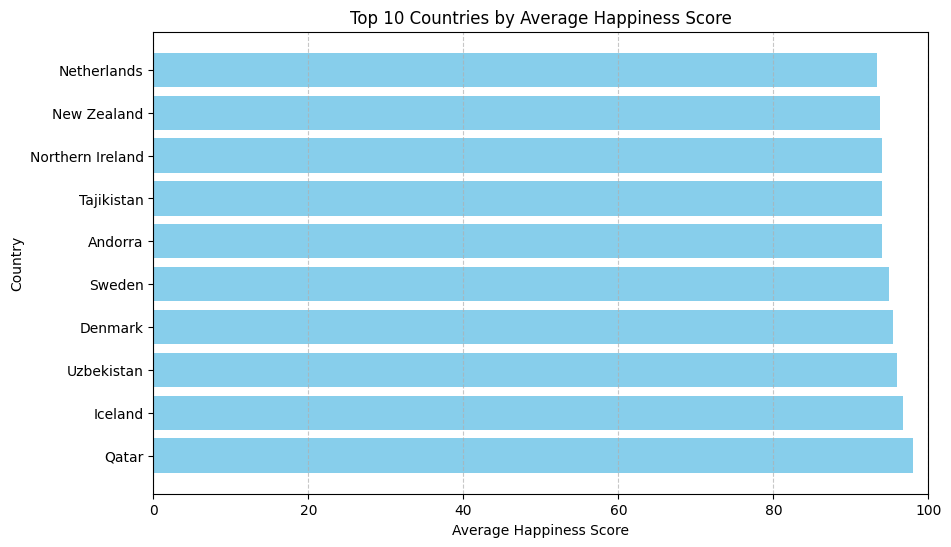

In [40]:
# Number of top countries to display
top_n = 10  # Change this value to display more or fewer countries

# Select the top N countries based on average happiness scores
top_happiness_by_country = average_happiness_by_country.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_happiness_by_country['Country'], top_happiness_by_country['Happiness'], color='skyblue')
plt.xlabel('Average Happiness Score')
plt.ylabel('Country')
plt.title(f'Top {top_n} Countries by Average Happiness Score')
plt.xlim(0, 100)  # Assuming the happiness score ranges from 0 to 10
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



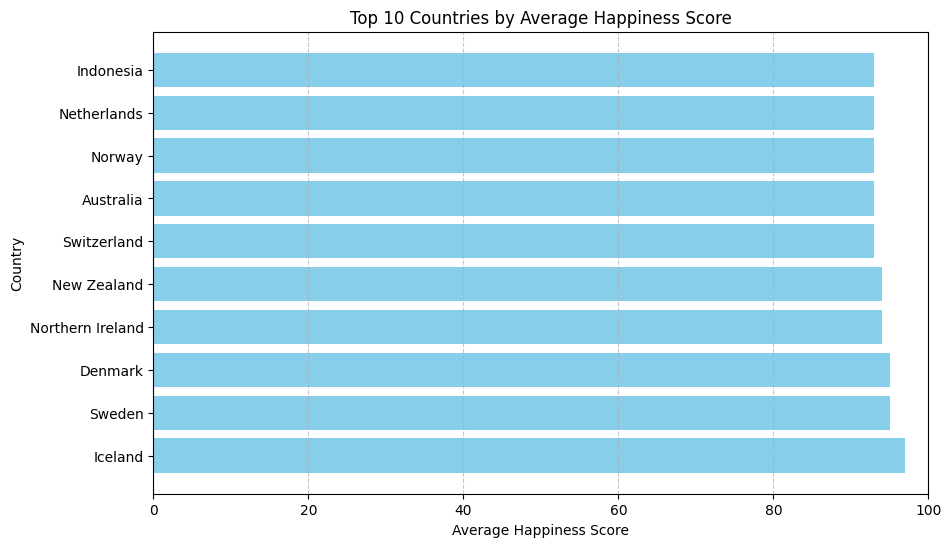

In [47]:
# Set the minimum number of data points required (optional)
min_data_points = 3

# Filter out countries with less than the minimum required data points
filtered_df = happiness_df.groupby('Country').filter(lambda x: len(x) >= min_data_points)

# Group by Country and calculate the average happiness score
average_happiness_by_country = filtered_df.groupby('Country')['Happiness'].mean().reset_index()

# Round the scores
average_happiness_by_country['Happiness'] = average_happiness_by_country['Happiness'].round(0).astype(int)

# Sort and get the top ten countries
top_ten_happiness = average_happiness_by_country.sort_values(by='Happiness', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_ten_happiness['Country'], top_ten_happiness['Happiness'], color='skyblue')
plt.xlabel('Average Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Countries by Average Happiness Score')
plt.xlim(0, 100)  # Assuming the happiness score ranges from 0 to 10
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [49]:
# Save to a specific directory
happiness_df.to_csv('merged_happiness_df.csv', index=False)
